In [9]:
import pandas as pd
import seaborn as sns
from scipy.stats import norm, skew
from scipy import stats
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import time
color = sns.color_palette()
sns.set_style('darkgrid')
%matplotlib inline

In [10]:
boston = pd.read_csv('/Users/jbeiting/Desktop/CS_539/Boston_Housing.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


<AxesSubplot:>

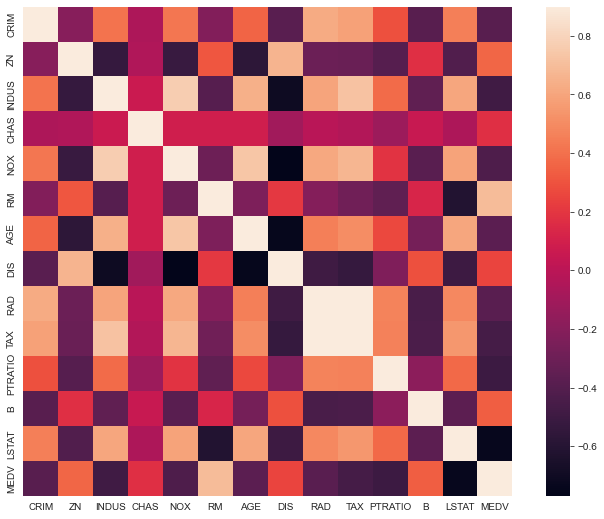

In [13]:
corr_mat = boston.corr()
plt.subplots(figsize = (12, 9))
sns.heatmap(corr_mat, vmax = 0.9, square = True)

In [29]:
predictors = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
target = boston['MEDV']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston, target, test_size = 0.2)

In [34]:
def launch_model(name,model, X_train, y_train, X_test, y_test):
    start = time.time()
    model.fit(X_train[predictors], y_train)
    y_pred = model.predict(X_test[predictors])
    ypred_train = model.predict(X_train[predictors])
    print ('MSE train', mean_absolute_error(y_train, ypred_train))
    print ('MSE test', mean_absolute_error(y_test, y_pred))
    r_2 = model.score(X_test[predictors], y_test)
    print ('R^2 test', r_2)
    print('Time to execute: {0:.2f} seconds.'.format(time.time() - start))
    return name + '($R^2={:.3f}$)'.format(r_2), np.array(y_test), y_pred

In [35]:
def plot(results):
    '''
    Create a plot comparing multiple learners.
    `results` is a list of tuples containing:
        (title, expected values, actual values)
    
    All the elements in results will be plotted.
    '''

    # Using subplots to display the results on the same X axis
    fig, plts = plt.subplots(nrows = len(results), figsize = (8, 8))
    fig.canvas.set_window_title('Predicting Boston')

    # Show each element in the plots returned from plt.subplots()
    for subplot, (title, y, y_pred) in zip(plts, results):
        # Configure each subplot to have no tick marks
        # (these are meaningless for the sample dataset)
        subplot.set_xticklabels(())
        subplot.set_yticklabels(())

        # Label the vertical axis
        subplot.set_ylabel('House Price')

        # Set the title for the subplot
        subplot.set_title(title)

        # Plot the actual data and the prediction
        subplot.plot(y, 'b', label = 'actual')
        subplot.plot(y_pred, 'r', label = 'predicted')
        
        # Shade the area between the predicted and the actual values
        subplot.fill_between(
            # Generate X values [0, 1, 2, ..., len(y)-2, len(y)-1]
            np.arange(0, len(y), 1),
            y,
            y_pred,
            color = 'r',
            alpha = 0.2
        )

        # Mark the extent of the training data
        subplot.axvline(len(y) // 2, linestyle='--', color='0', alpha=0.2)

        # Include a legend in each subplot
        subplot.legend()

    # Let matplotlib handle the subplot layout
    fig.tight_layout()

    # ==================================
    # Display the plot in interactive UI
    plt.show()

    # To save the plot to an image file, use savefig()
    plt.savefig('/Users/jbeiting/Desktop/CS_539/SVRplot.png')

    # Open the image file with the default image viewer
    #import subprocess
    #subprocess.Popen('plot.png', shell=True)


    # Closing the figure allows matplotlib to release the memory used.
    plt.close()

In [36]:
svr_rbf = SVR(kernel='rbf', gamma=0.1)
svr_lineal = SVR(kernel='linear')
lr = LinearRegression()

In [38]:
results = []
print ('-----------')
print ('SVR - RBF')
print ('-----------')
results.append(launch_model('SVR - RBF', svr_rbf, X_train, y_train, X_test, y_test))
print ('-----------')
print ('SVR - linear')
print ('-----------')
results.append(launch_model('SVR - linear', svr_lineal, X_train, y_train, X_test, y_test))
print ('-----------')
print ('Linear Regression')
print ('-----------')
results.append(launch_model('Linear Regression', lr, X_train, y_train, X_test, y_test))

-----------
SVR - RBF
-----------
MSE train 5.356880503093601
MSE test 7.061754807774672
R^2 test -0.12079587933996128
Time to execute: 0.07 seconds.
-----------
SVR - linear
-----------
MSE train 3.0960651241908526
MSE test 3.2559468968104266
R^2 test 0.6897547042062351
Time to execute: 3.46 seconds.
-----------
Linear Regression
-----------
MSE train 3.2625060530553847
MSE test 3.435955309530416
R^2 test 0.7075074773125403
Time to execute: 0.01 seconds.


/var/folders/p_/x_t__bpn1kjcchsm_wvy8vzw0000gn/T/ipykernel_72559/2047901799.py:12: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  fig.canvas.set_window_title('Predicting Boston')


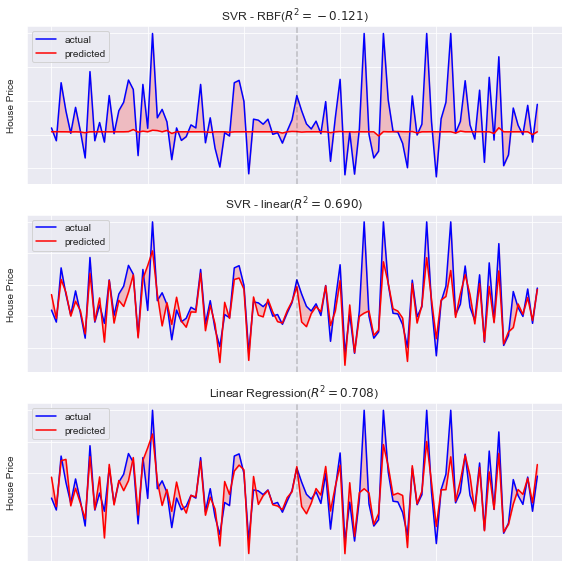

In [39]:
plot(results)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[predictors])
X_train[predictors] = scaler.transform(X_train[predictors])
X_test[predictors] = scaler.transform(X_test[predictors])

In [41]:
results = []
print ('-----------')
print ('SVR - RBF')
print ('-----------')
results.append(launch_model('SVR - RBF', svr_rbf, X_train, y_train, X_test, y_test))
print ('-----------')
print ('SVR - linear')
print ('-----------')
results.append(launch_model('SVR - linear', svr_lineal, X_train, y_train, X_test, y_test))
print ('-----------')
print ('Linear Regression')
print ('-----------')
results.append(launch_model('Linear Regression', lr, X_train, y_train, X_test, y_test))

-----------
SVR - RBF
-----------
MSE train 2.93891592757245
MSE test 3.5398666719176344
R^2 test 0.5984107611174907
Time to execute: 0.08 seconds.
-----------
SVR - linear
-----------
MSE train 3.078115132130388
MSE test 3.239697455304544
R^2 test 0.6856716759725291
Time to execute: 0.03 seconds.
-----------
Linear Regression
-----------
MSE train 3.262506053055381
MSE test 3.4359553095304314
R^2 test 0.70750747731254
Time to execute: 0.02 seconds.


/var/folders/p_/x_t__bpn1kjcchsm_wvy8vzw0000gn/T/ipykernel_72559/2047901799.py:12: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  fig.canvas.set_window_title('Predicting Boston')


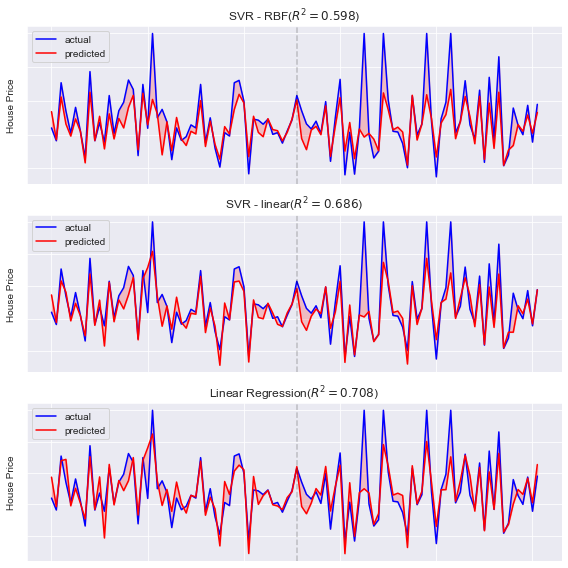

In [42]:
plot(results)

/Users/jbeiting/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 22.53 and sigma = 9.19



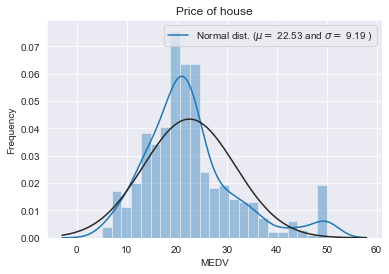

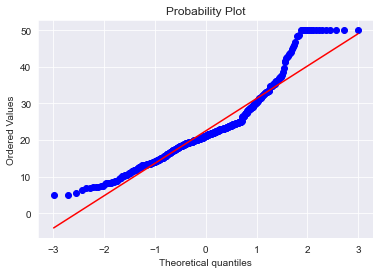

In [43]:
sns.distplot(target , fit = norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(target)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc = 'best')
plt.ylabel('Frequency')
plt.title('Price of house')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(target, plot = plt)
plt.show()

/Users/jbeiting/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 3.09 and sigma = 0.39



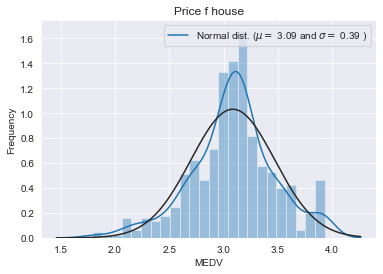

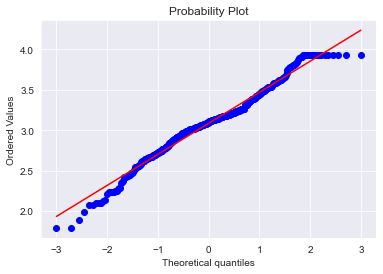

In [44]:
target = np.log1p(target)

sns.distplot(target , fit = norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(target)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc = 'best')
plt.ylabel('Frequency')
plt.title('Price f house')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(target, plot = plt)
plt.show()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(boston, target, test_size = 0.2)

In [46]:
def launch_model(name,model, X_train, y_train, X_test, y_test):
    start = time.time()
    model.fit(X_train[predictors], y_train)
    y_pred = model.predict(X_test[predictors])
    ypred_train = model.predict(X_train[predictors])
    print ('MSE train', mean_absolute_error(np.expm1(y_train), np.expm1(ypred_train)))
    print ('MSE test', mean_absolute_error(np.expm1(y_test), np.expm1(y_pred)))
    r_2 = model.score(X_test[predictors], y_test)
    print ('R^2 test', r_2)
    print('Time to execute: {0:.2f} seconds.'.format(time.time() - start))
    return name + '($R^2={:.3f}$)'.format(r_2), np.expm1(np.array(y_test)), np.expm1(y_pred)

In [48]:
results = []
print ('-----------')
print ('SVR - RBF')
print ('-----------')
results.append(launch_model('SVR - RBF', svr_rbf, X_train, y_train, X_test, y_test))
print ('-----------')
print ('SVR - linear')
print ('-----------')
results.append(launch_model('SVR - linear', svr_lineal, X_train, y_train, X_test, y_test))
print ('-----------')
print ('Linear Regression')
print ('-----------')
results.append(launch_model('Linear Regression', lr, X_train, y_train, X_test, y_test))

-----------
SVR - RBF
-----------
MSE train 1.9809373006468967
MSE test 6.295246347434981
R^2 test 0.11838883867440086
Time to execute: 0.10 seconds.
-----------
SVR - linear
-----------
MSE train 2.7995628017306298
MSE test 2.460932561939415
R^2 test 0.8102167502255346
Time to execute: 23.09 seconds.
-----------
Linear Regression
-----------
MSE train 2.9215722796716146
MSE test 2.772885944829559
R^2 test 0.8280970845507284
Time to execute: 0.02 seconds.


/var/folders/p_/x_t__bpn1kjcchsm_wvy8vzw0000gn/T/ipykernel_72559/2047901799.py:12: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  fig.canvas.set_window_title('Predicting Boston')


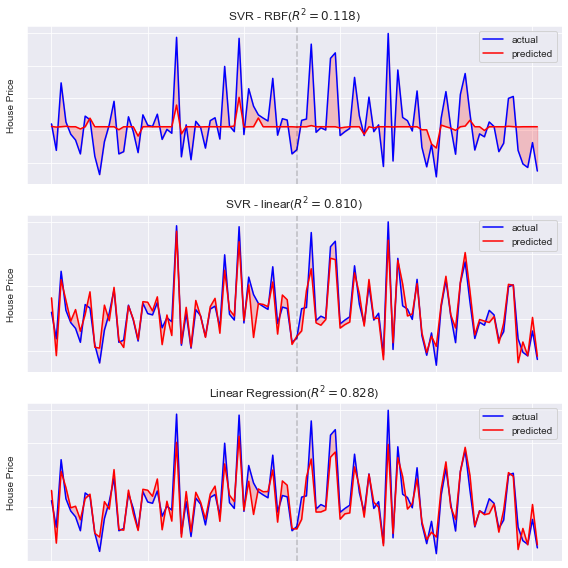

In [49]:
plot(results)